Text(0.3, 0.3, '한글')

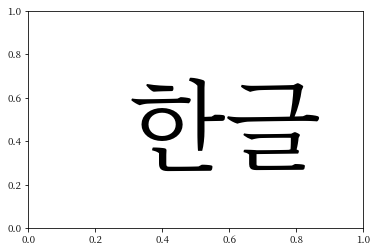

In [1]:
# 한글글꼴 경로 확인
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

import matplotlib
import matplotlib.pyplot as plt

# 근데 우분투 한글 기본 글꼴이 이거였어???
path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.text(0.3, 0.3, '한글', size=100)

# import sklearn

# #나눔 폰트를 사용합니다.
# matplotlib.rc('font', family='NotoSerifCJK-Regular')
# matplotlib.rcParams['axes.unicode_minus'] = False

# # imshow 함수로 흑백 이미지를 출력하기 위해
# plt.rcParams['image.cmap'] = "gray"
# plt.text(0.3, 0.3, '한글', size=100)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [3]:
import os.path

if not os.path.isfile('data/aclImdb_v1.tar.gz'):
    !wget -q http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
    !tar -xzf data/aclImdb_v1.tar.gz -C data

In [4]:
# !은 셸(shell) 명령을 실행해주는 IPython의 매직 명령어입니다.
# tree 명령이 없다면 find ./data -type d 명령을 사용해 하위 폴더의 목록을 
# 볼 수 있습니다. 윈도에서는 !tree data/aclImdb 와 같이 사용하세요.
# !tree -dL 2 data/aclImdb
!find ./data -type d

./data
./data/aclImdb
./data/aclImdb/train
./data/aclImdb/train/neg
./data/aclImdb/train/pos
./data/aclImdb/test
./data/aclImdb/test/neg
./data/aclImdb/test/pos


In [5]:
!rm -r data/aclImdb/train/unsup

rm: 'data/aclImdb/train/unsup'를 지울 수 없음: 그런 파일이나 디렉터리가 없습니다


In [6]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입: ", type(text_train))
print("text_train의 길이: ", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입:  <class 'list'>
text_train의 길이:  25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [7]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
print("text_train[6]:\n", text_train[6])

text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [8]:
print("클래스별 샘플 수(훈련 데이터): ", np.bincount(y_train))

클래스별 샘플 수(훈련 데이터):  [12500 12500]


In [9]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("text_test의 길이: ", len(text_test))
print("클래스별 샘플 수(테스트 데이터): ", np.bincount(y_test))

text_test = [doc.replace(b"<br />", b" ") for doc in text_test]
print("text_test[6]:\n", text_test[6])


text_test의 길이:  25000
클래스별 샘플 수(테스트 데이터):  [12500 12500]
text_test[6]:
 b"I think this is one hell of a movie...........We can see Steven fighting around with his martial art stuff again and like in all Segal movies there's a message in it, without the message it would be one of many action/fighting movies but the message is what makes segal movies great and special."


In [10]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [12]:
print("사전의 크기: ", len(vect.vocabulary_))
print("사전의 내용:\n", vect.vocabulary_)

사전의 크기:  13
사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [13]:
bag_of_words = vect.transform(bards_words)
print("BOW: ", repr(bag_of_words))

BOW:  <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [14]:
print("BOW 밀집 표현?\n", bag_of_words.toarray())

BOW 밀집 표현?
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [15]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [16]:
feature_names = vect.get_feature_names_out()
print("특성 개수", len(feature_names))
print("처음 20개 특성\n", feature_names[:20])
print("20010에서 20030까지 특성\n", feature_names[20010:20030])
print("매 2000번째 특성\n", feature_names[::2000])

특성 개수 74849
처음 20개 특성
 ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
20010에서 20030까지 특성
 ['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
매 2000번째 특성
 ['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [17]:
[text_train[i] for i in np.argwhere(X_train[:,9] == 1)[:, 0]]
# 007이 어휘 사전에서 10번째 나오는 단어이므로... 이 위치의 값이 1인 행을 찾아서...
# text_train[i] for i in np.argwhere(X_train[:,9] == 1)
# 훈련 데이터 보여주기 [:, 0]

[b'"Dutch Schultz", AKA Arthur Fleggenheimer, was a real person and his rather nasty life is fairly well documented. This movie which purports to depict his life should have used a fictional character, because the overdramatized events are too strong a departure from the facts and the chronology. Not only that, it ignores some interesting details which other versions have included such as the public relations fiasco in upstate N.Y. and his religious conversion. It is true that he was executed by Luciano, Lansky, et. al. but that\'s as far as it goes. The exploding plate scene which represents Luciano carrying out the execution of Bo Weinberg in his own home, assisted by his own mother is rediculous. Also, there is the scene in which Dutch approaches his own mother to pay protection to Legs Diamond. It just doesn\'t work. The character of Mrs. Fleggenheimer doesn\'t work either. This movie does not need a doting Jewish mother for comic relief. The lame representation of Legs Diamond was

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, n_jobs=-1)
print("교차검증평균점수: {:.2f}".format(np.mean(scores)))

교차검증평균점수: 0.88


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 점수: 0.89
최적의 매개변수:  {'C': 0.1}


In [20]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


In [21]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names_out()
print("특성 개수", len(feature_names))
print("처음 20개 특성\n", feature_names[:50])
print("20010에서 20030까지 특성\n", feature_names[20010:20030])
print("매 700번째 특성\n", feature_names[::700])

특성 개수 27271
처음 20개 특성
 ['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
20010에서 20030까지 특성
 ['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
매 700번째 특성
 ['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting' 'tvs' 'vampy

In [23]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.89


In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['with', 'been', 'whose', 'few', 'third', 'still', 'behind', 'why', 'may', 'inc', 'whither', 'sometimes', 'cannot', 'towards', 'myself', 'over', 'more', 'their', 'system', 'whereby', 'eg', 'or', 'your', 'amount', 'can', 'almost', 'meanwhile', 'thin', 'in', 'now', 'becomes', 'next']


In [25]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [26]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.88


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.89


In [28]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
print(max_value) # [0.39314587 0.32476869 0.33912267 ... 0.43735711 0.41781736 0.14005376] # 얜 그냥 tfidf 값

sorted_by_tfidf = max_value.argsort()
print(sorted_by_tfidf) # [23668 10103 11968 ... 21090 23134 18303] # 얜 인덱스

feature_names = np.array(vectorizer.get_feature_names_out())
print(feature_names) # ['00' '000' '007' ... 'zuniga' 'zwick' 'émigré'] # 얘가 진짜 값이지...

print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[-20:]])

[0.39314587 0.32476869 0.33912267 ... 0.43735711 0.41781736 0.14005376]
[23668 10103 11968 ... 21090 23134 18303]
['00' '000' '007' ... 'zuniga' 'zwick' 'émigré']
가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성:
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [29]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성\n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


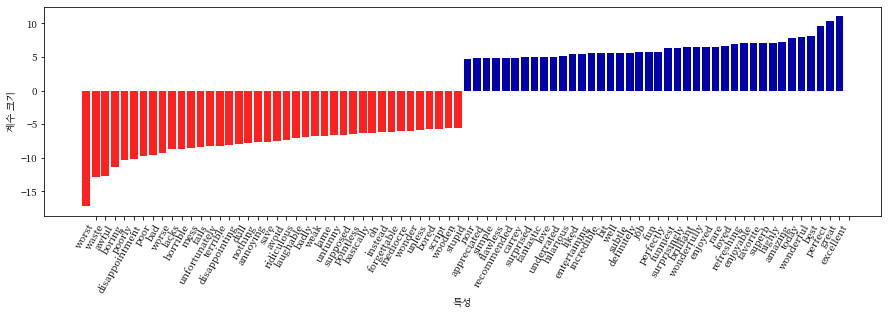

In [30]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_[0],
                                    feature_names,
                                    n_top_features=40)

In [31]:
grid.best_estimator_.named_steps["logisticregression"].coef_
# array([[-0.44183487, -0.4832464 , -0.1185397 , ...,  0.29046433,
#         -0.08885174, -0.36811765]])

grid.best_estimator_.named_steps["logisticregression"].coef_[0]
# array([-0.44183487, -0.4832464 , -0.1185397 , ...,  0.29046433,
#        -0.08885174, -0.36811765])

array([-0.44183487, -0.4832464 , -0.1185397 , ...,  0.29046433,
       -0.08885174, -0.36811765])

In [32]:
print("bards_words:\n", bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [33]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("사전 크기: ", len(cv.vocabulary_))
print("사전:\n", cv.get_feature_names_out())

사전 크기:  13
사전:
 ['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [34]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print("사전 크기: ", len(cv.vocabulary_))
print("사전:\n", cv.get_feature_names_out())

사전 크기:  14
사전:
 ['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [35]:
print("변환된 데이터 (밀집배열)\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집배열)
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [36]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print("사전 크기: ", len(cv.vocabulary_))
print("사전:\n", cv.get_feature_names_out())

사전 크기:  39
사전:
 ['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [37]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid= {'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100],
            'tfidfvectorizer__ngram_range':[(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n", grid.best_params_)

최상의 교차 검증 점수: 0.91
최적의 매개변수:
 {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


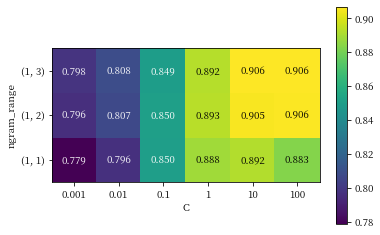

In [38]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
                               xticklabels=param_grid['logisticregression__C'],
                               yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

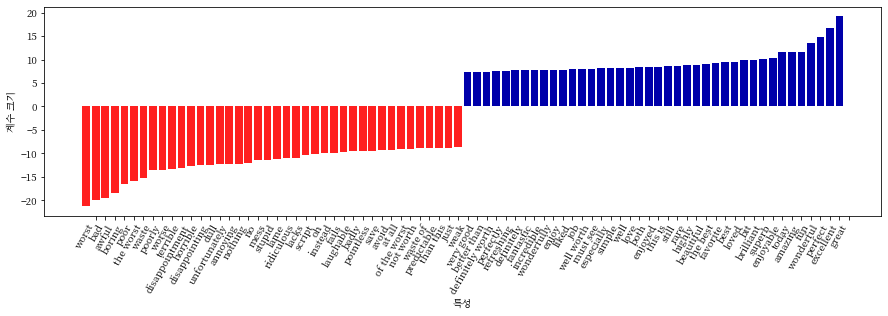

In [39]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_[0]
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

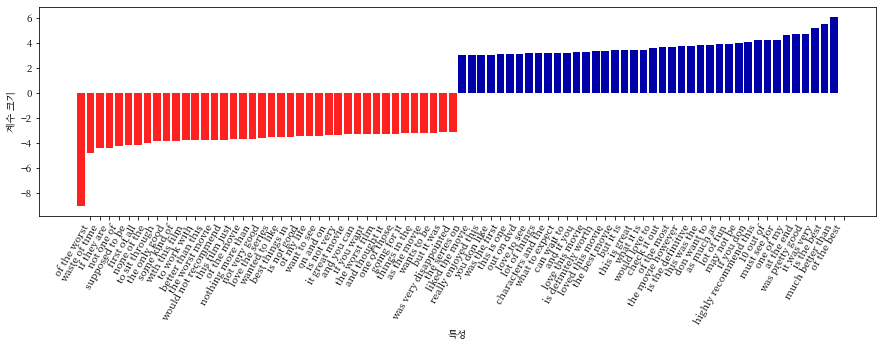

In [40]:
# 아니, 이게 맞는거 아냐? 실재로 이거 정상 동작함
# mask = np.array([len(feature.split(" ")) == 3 for feature in feature_names]) 
# 책에서는 이렇게 하라고 하네요...
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)

In [42]:
import spacy
import nltk

en_nlp = spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()

In [43]:
def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    print("어간:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [44]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

표제어:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [45]:
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df = 5)
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: ", X_train_lemma.shape)

vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: ", X_train.shape)

/home/supreme/anaconda3/envs/imlp/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train_lemma.shape:  (25000, 21880)
X_train.shape:  (25000, 27271)


In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=cv, n_jobs=-1)

grid.fit(X_train, y_train)
print("최상의 교차 검증 점수"
     "(기본 CV: {:.3f})".format(grid.best_score_))

grid.fit(X_train_lemma, y_train)
print("최상의 교차 검증 점수"
     "(표제어: {:.3f})".format(grid.best_score_))


최상의 교차 검증 점수(기본 CV: 0.719)
최상의 교차 검증 점수(표제어: 0.717)


In [48]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [50]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0, n_jobs=-1)
document_topics = lda.fit_transform(X)

In [51]:
print("lda.components_.shape: ", lda.components_.shape)

lda.components_.shape:  (10, 10000)


In [53]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1] # 아 씨발 이런게 잘 모르겠떠라... 토픽마다(components_의 행) 특성을 오름차순으로 정렬, 내림차순이 되도록 [:, ::-1]을 사용해 행의 정렬을 반대로 바꿈
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       thought       
real          american      laugh         tv            am            
us            our           jokes         episodes      thing         
director      documentary   fun           shows         got           
work          history       humor         season        10            
both          years         re            new           want          
beautiful     new           hilarious     years         going         
each          human         doesn         television    watched       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [54]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=25, random_state=0, n_jobs=-1)
document_topics100 = lda100.fit_transform(X)

In [56]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [57]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
horror        didn          science       gets          beautiful     
creepy        wasn          fiction       car           real          
house         minutes       space         goes          true          
atmosphere    pretty        star          guy           between       
scary         nothing       trek          killed        excellent     
dark          thing         years         girl          moving        
suspense      thought       sci           down          chinese       
thriller      going         fi            around        actors        
fans          boring        captain       police        each          
genre         got           past          home          truly         
haunted       ending        crew          doesn         feel          
old           maybe         joe           going         makes         
strang

In [55]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b"After losing the Emmy for her performance as Mama Rose in the television version of GYPSY, Bette won an Emmy the following year for BETTE MIDLER: DIVA LAS VEGAS, a live concert special filmed for HBO from Las Vegas. Midler, who has been performing live on stage since the 1970's, proves that she is still one of the most electrifying live performers in the business.\n"
b"After losing the Emmy for her performance as Mama Rose in the television version of GYPSY, Bette won an Emmy the following year for BETTE MIDLER: DIVA LAS VEGAS, a live concert special filmed for HBO from Las Vegas. Midler, who has been performing live on stage since the 1970's, proves that she is still one of the most electrifying live performers in the business.\n"
b"Surviving Christmas (2004) Ben Affleck, James Gandolfini, Christina Applegate, Catherine O' Hara, Josh Zuckerman, Bill Macy, Jennifer Morrison, Udo Kier, D: Mike Mitchell. Dumped by his girlfriend, a hotshot yuppie doesn't want to be left alone on Christ

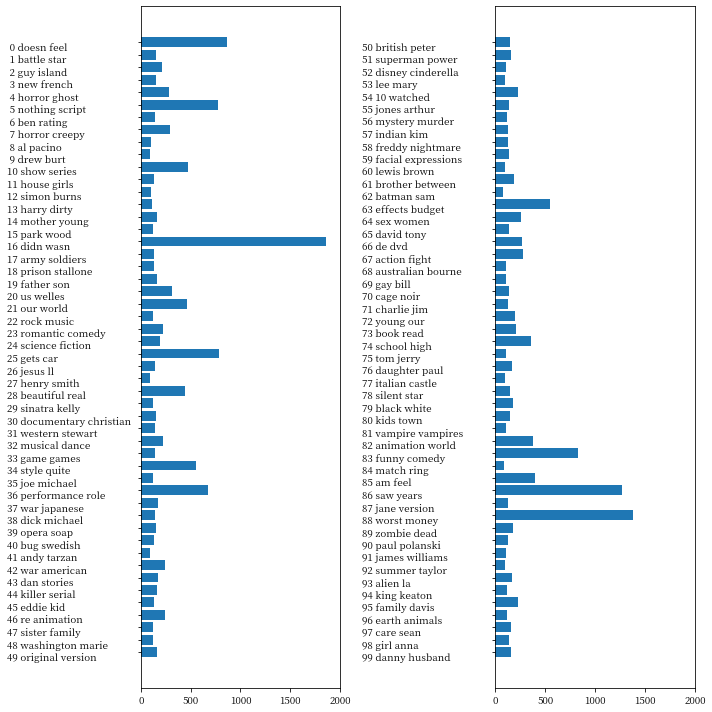

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

class MyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, first_paramter=1, second_parameter=2):
        # __init__ 메소드에 필요한 모든 매개변수를 나열합니다
        self.first_paramter = 1
        self.second_parameter = 2
        
    def fit(self, X, y=None):
        # fit 메소드는 X와 y 매개변수만을 갖습니다
        # 비지도 학습 모델이더라도 y 매개변수를 받도록 해야합니다!
        
        # 모델 학습 시작
        print("모델 학습을 시작합니다")
        # 객체 자신인 self를 반환합니다
        return self
    
    def transform(self, X):
        # transform 메소드는 X 매개변수만을 받습니다
        
        # X를 변환합니다
        X_transformed = X + 1
        return X_transformed